In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
data = load_iris()
X = data.data
y = data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

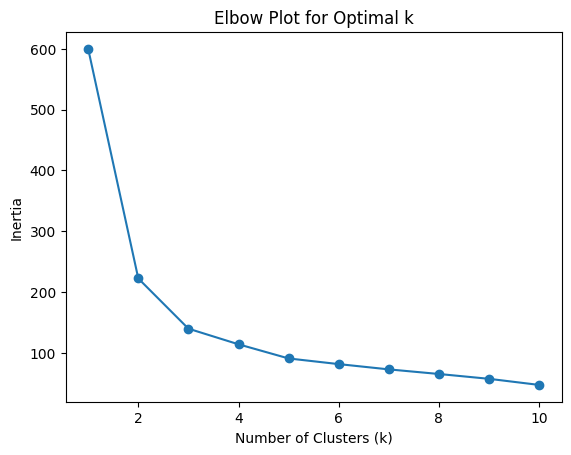

In [4]:
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot for Optimal k')
plt.show()

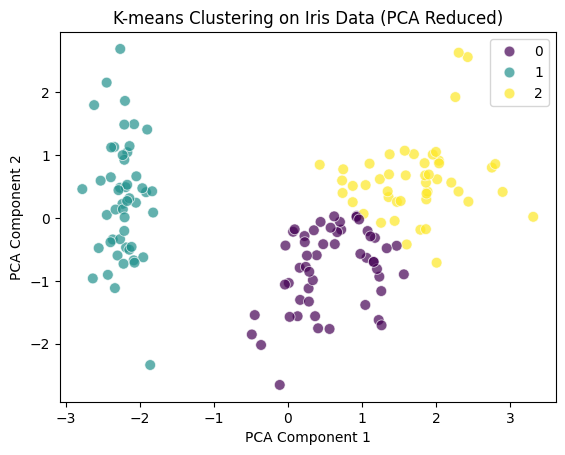

In [5]:
kmeans = KMeans(n_clusters=3, random_state=0)
X_clustered = kmeans.fit_predict(X_scaled)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X_clustered, palette="viridis", s=60, alpha=0.7)
plt.title('K-means Clustering on Iris Data (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [6]:
new_data = [[5.1, 3.5, 1.4, 0.2]]
new_data_scaled = scaler.transform(new_data)
cluster_label = kmeans.predict(new_data_scaled)
print(f"The new data point belongs to cluster: {cluster_label[0]}")

The new data point belongs to cluster: 1
